In [1]:
import os
from math import floor
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 输入文件的路径，获得正负例个数的情况
def get_label_count(file_path):
    with open(file_path, 'r') as f:
        count_dict = {}
        while True:
            line = f.readline()
            if not line:
                break
            line_split = line.split()
            label = line_split[1]
            if label in count_dict:
                count_dict[label] += 1
            else:
                count_dict[label] = 1
        return count_dict

In [3]:
# 获得所有蛋白质的正负例的情况
dir_path = "/home/wngys/lab/DeepFold/pair/pair_bool_90/"

label_dict = {}

for file_path in os.listdir(dir_path):
    file_path = os.path.join(dir_path, file_path)
    ID = file_path.split('/')[-1].split('.')[0]
    # print(ID)
    count = get_label_count(file_path)
    label_dict[ID] = count

In [4]:
label_dict['d1qqp3_']

{'0': 1049, '1': 5}

In [5]:
print(len(label_dict.keys()))

14244


In [6]:
# 画出直方图
backet_num = 1000
backet = np.zeros(backet_num + 1).tolist()
backet_dict = {}
print(len(backet))

1001


In [7]:
for ID in label_dict.keys():
    count = label_dict[ID]
    ratio = 0.0
    if '0' not in count.keys():
        ratio = count['1'] / count['1']
    elif '1' not in count.keys():
        ratio = 0 / count['0']
    else:
        ratio = count['1'] / (count['0'] + count['1'])
    idx = floor(ratio * 1000)
    if idx > backet_num:
        idx = backet_num
    backet[idx] += 1
    if idx in backet_dict:
        backet_dict[idx].append(ID)
    else:
        backet_dict[idx] = [ID]

In [8]:
backet_dict_keys = list(backet_dict.keys())
backet_dict_keys.sort()
print(len(backet_dict_keys))
print(backet_dict_keys)

297
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 168, 170, 171, 172, 173, 175, 176, 177, 178, 180, 181, 183, 185, 186, 187, 188, 190, 191, 192, 194, 195, 198, 200, 204, 205, 208, 212, 214, 216, 217, 222, 225, 227, 228, 229, 230, 232, 235, 238, 240, 242, 243, 246, 250, 255, 258, 260, 261, 263, 264, 265, 267, 269, 270, 272, 277, 280, 281, 282, 285, 291, 

In [9]:
print(backet[200])

17.0


In [10]:
print(backet_dict[100])

['d4ogca4', 'd5dgja1', 'd5b7ha1', 'd4ycub1', 'd5ubmb1', 'd1s7ma_', 'd4eqma_', 'd2d8ra1', 'd5opfa_', 'd5h20a_', 'd5vj0a_', 'd4ybna_', 'd3d9ra1', 'd1ocya_', 'd5mxca1', 'd2v8qe2', 'd5xbob_', 'd4laya2', 'd3jb9y1', 'd2qamh1', 'd3axaa_', 'd5xtfa_', 'd2w2db1', 'd1iyca_', 'd5ufta1', 'd5svva_']


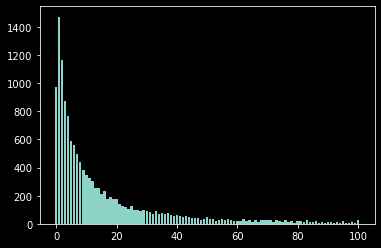

In [13]:
ln = 0
rn = 100
plt.bar(range(ln, rn+1), backet[ln:rn+1])
plt.show()

In [17]:
# 找出负例个数小于thres个的蛋白质
thres = 10

neg_less_label_dict = {}

for ID in label_dict.keys():
    count = label_dict[ID]
    if ('0' not in count) or (count['0'] < thres):
        neg_less_label_dict[ID] = count

In [18]:
print(len(neg_less_label_dict.keys()))
print(list(neg_less_label_dict.keys()))

226
['d5axwa4', 'd4oita1', 'd5w7za2', 'd5ohka_', 'd5ts9a_', 'd5x7va_', 'd1sg1x4', 'd5y3ca1', 'd4zohb1', 'd4i9xc3', 'd4lmsa_', 'd5mkka1', 'd5hk3a_', 'd2i9wa3', 'd5dgja1', 'd5y1fa1', 'd5tuvb_', 'd5w83b_', 'd5odua_', 'd1ogyb_', 'd5k3ha3', 'd5erqa1', 'd4xfja2', 'd5wb8c_', 'd5ws7a_', 'd5xopa1', 'd5ompa3', 'd6bmaa1', 'd5ie8a_', 'd4cr2h3', 'd5gvya_', 'd5x3pa_', 'd5ubmb1', 'd5lj3n2', 'd2kraa1', 'd6b9xb1', 'd5uyja1', 'd5um2a1', 'd5wl1a1', 'd6bk0a_', 'd5v0za_', 'd4cpai_', 'd5urna1', 'd5n92f_', 'd1ixta_', 'd2z7fi_', 'd4r5ra_', 'd5xn9a1', 'd4qf3a1', 'd4mt2a_', 'd1omca_', 'd4pj11_', 'd5troa1', 'd5o9ma1', 'd5muaa1', 'd1s7ma_', 'd6b8sa1', 'd1t2ya_', 'd5nbfa_', 'd5tkwa1', 'd5e4ga_', 'd5xdta2', 'd1jhna3', 'd5hrja_', 'd2cqea2', 'd5szva_', 'd5itqa1', 'd1a6bb_', 'd5cula_', 'd5gmkf_', 'd6bkva1', 'd5jn5a4', 'd5xeca_', 'd5mu9a1', 'd5k28a1', 'd1rjuv_', 'd5uj5a1', 'd1rmka_', 'd5vg0a_', 'd5opfa_', 'd2j01p1', 'd5tv2a2', 'd3ag3f_', 'd1pxea_', 'd5wtza1', 'd2nwta1', 'd3pt6a1', 'd5bnza2', 'd1dsqa_', 'd5jsca1', 'd5x3

In [13]:
# import numpy as np

# np.save("/home/wngys/lab/DeepFold/protein_infor/negLess10IDArray.npy", list(neg_less_label_dict.keys()))

In [14]:
# ll = np.load("/home/wngys/lab/DeepFold/protein_infor/negLess10IDArray.npy", allow_pickle=True).tolist()
# print(len(ll))

226


In [19]:
# 画出直方图
neg_less_backet_num = 1000
neg_less_backet = np.zeros(neg_less_backet_num + 1).tolist()
neg_less_backet_dict = {}
print(len(neg_less_backet))

1001


In [20]:
for ID in neg_less_label_dict.keys():
    count = neg_less_label_dict[ID]
    ratio = 0.0
    if '0' not in count.keys():
        ratio = count['1'] / count['1']
    elif '1' not in count.keys():
        ratio = 0 / count['0']
    else:
        ratio = count['1'] / (count['0'] + count['1'])
    idx = floor(ratio * 1000)
    if idx > neg_less_backet_num:
        idx = neg_less_backet_num
    neg_less_backet[idx] += 1
    if idx in neg_less_backet_dict:
        neg_less_backet_dict[idx].append(ID)
    else:
        neg_less_backet_dict[idx] = [ID]

In [22]:
neg_less_backet_dict_keys = list(neg_less_backet_dict.keys())
neg_less_backet_dict_keys.sort()
print(len(neg_less_backet_dict_keys))
print(neg_less_backet_dict_keys)

44
[100, 111, 125, 142, 166, 181, 200, 222, 250, 272, 285, 300, 307, 333, 357, 363, 375, 384, 400, 428, 454, 461, 470, 500, 533, 545, 555, 600, 611, 615, 636, 666, 684, 687, 695, 714, 733, 750, 800, 857, 909, 915, 923, 1000]


In [32]:
neg_less_backet_dict[100]

['d5dgja1',
 'd5ubmb1',
 'd1s7ma_',
 'd5opfa_',
 'd5vj0a_',
 'd1ocya_',
 'd5mxca1',
 'd3jb9y1',
 'd5xtfa_',
 'd2w2db1',
 'd1iyca_',
 'd5ufta1',
 'd5svva_']

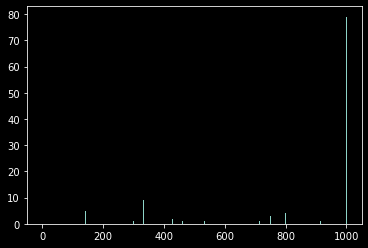

In [25]:
ln = 0
rn = 1000
plt.bar(range(ln, rn+1), neg_less_backet[ln:rn+1])
plt.show()

In [23]:
# 找出负例个数大于等于thres个的蛋白质
thres = 10

neg_more_label_dict = {}

for ID in label_dict.keys():
    count = label_dict[ID]
    if ('0' in count) and (count['0'] > thres):
        neg_more_label_dict[ID] = count

In [25]:
print(len(neg_more_label_dict.keys()))

14004


In [26]:
# 画出直方图
neg_more_backet_num = 1000
neg_more_backet = np.zeros(neg_more_backet_num + 1).tolist()
neg_more_backet_dict = {}
print(len(neg_more_backet))

1001


In [27]:
for ID in neg_more_label_dict.keys():
    count = neg_more_label_dict[ID]
    ratio = 0.0
    if '0' not in count.keys():
        ratio = count['1'] / count['1']
    elif '1' not in count.keys():
        ratio = 0 / count['0']
    else:
        ratio = count['1'] / (count['0'] + count['1'])
    idx = floor(ratio * 1000)
    if idx > neg_more_backet_num:
        idx = neg_more_backet_num
    neg_more_backet[idx] += 1
    if idx in neg_more_backet_dict:
        neg_more_backet_dict[idx].append(ID)
    else:
        neg_more_backet_dict[idx] = [ID]

In [28]:
neg_more_backet_dict_keys = list(neg_more_backet_dict.keys())
neg_more_backet_dict_keys.sort()
print(len(neg_more_backet_dict_keys))
print(neg_more_backet_dict_keys)

271
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 168, 170, 171, 172, 173, 175, 176, 177, 178, 180, 181, 183, 185, 186, 187, 188, 190, 191, 192, 194, 195, 198, 200, 204, 205, 208, 212, 214, 216, 217, 222, 225, 227, 228, 229, 230, 232, 235, 238, 240, 242, 243, 246, 250, 255, 258, 260, 261, 263, 264, 265, 267, 269, 270, 272, 277, 280, 281, 282, 291, 292, 

In [34]:
neg_more_backet_dict[460]

['d4lnia1']

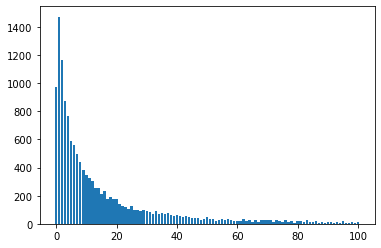

In [31]:
ln = 0
rn = 100
plt.bar(range(ln, rn+1), neg_more_backet[ln:rn+1])
plt.show()

In [2]:
import os
from math import floor
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 输入文件的路径，获得正负例个数的情况
def get_label_count(file_path):
    with open(file_path, 'r') as f:
        count_dict = {}
        while True:
            line = f.readline()
            if not line:
                break
            line_split = line.split()
            label = line_split[1]
            if label in count_dict:
                count_dict[label] += 1
            else:
                count_dict[label] = 1
        return count_dict

In [4]:
# 计算平均pair数
dir_path = "/home/wngys/lab/DeepFold/pair/train_pair_bool_90/"

label_dict = {}

for file_path in os.listdir(dir_path):
    file_path = os.path.join(dir_path, file_path)
    ID = file_path.split('/')[-1].split('.')[0]
    # print(ID)
    count = get_label_count(file_path)
    label_dict[ID] = count

In [8]:
label_dict['d1nt2b_']

{'1': 102, '0': 986}

In [9]:
label_dict_keys = list(label_dict.keys())
print(len(label_dict_keys))

8410


In [11]:
count = 0
for ID in label_dict_keys:
    count += label_dict[ID]['0'] + label_dict[ID]['1']
print(count)

8631616


In [12]:
avg_count = count / len(label_dict_keys)
print(avg_count)

1026.3514863258026
